In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import sklearn

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('glass_identify.csv')
df.head()

,Id number,Refractive index,Na,Mg,Si,K,Ca,Ba,Fe,Target
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.shape

(214, 10)

In [5]:
df.describe()

,Id number,Refractive index,Na,Mg,Si,K,Ca,Ba,Fe,Target
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


EDA

In [6]:
df=df.drop_duplicates()

In [7]:
df.shape

(213, 10)

One duplicate is there and its been removed

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 1 to 214
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id number         213 non-null    float64
 1   Refractive index  213 non-null    float64
 2   Na                213 non-null    float64
 3   Mg                213 non-null    float64
 4   Si                213 non-null    float64
 5   K                 213 non-null    float64
 6   Ca                213 non-null    float64
 7   Ba                213 non-null    float64
 8   Fe                213 non-null    float64
 9   Target            213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


check for null values

In [9]:
df.isnull().sum()

Id number           0
Refractive index    0
Na                  0
Mg                  0
Si                  0
K                   0
Ca                  0
Ba                  0
Fe                  0
Target              0
dtype: int64

There are no null values

In [10]:
df.drop("Id number",axis=1,inplace=True)

In [11]:
df1=df.drop("Target",axis=1)

Outliers

Refractive index       Axes(0.125,0.712609;0.227941x0.167391)
Na                  Axes(0.398529,0.712609;0.227941x0.167391)
Mg                  Axes(0.672059,0.712609;0.227941x0.167391)
Si                     Axes(0.125,0.511739;0.227941x0.167391)
K                   Axes(0.398529,0.511739;0.227941x0.167391)
Ca                  Axes(0.672059,0.511739;0.227941x0.167391)
Ba                      Axes(0.125,0.31087;0.227941x0.167391)
Fe                   Axes(0.398529,0.31087;0.227941x0.167391)
Target               Axes(0.672059,0.31087;0.227941x0.167391)
dtype: object

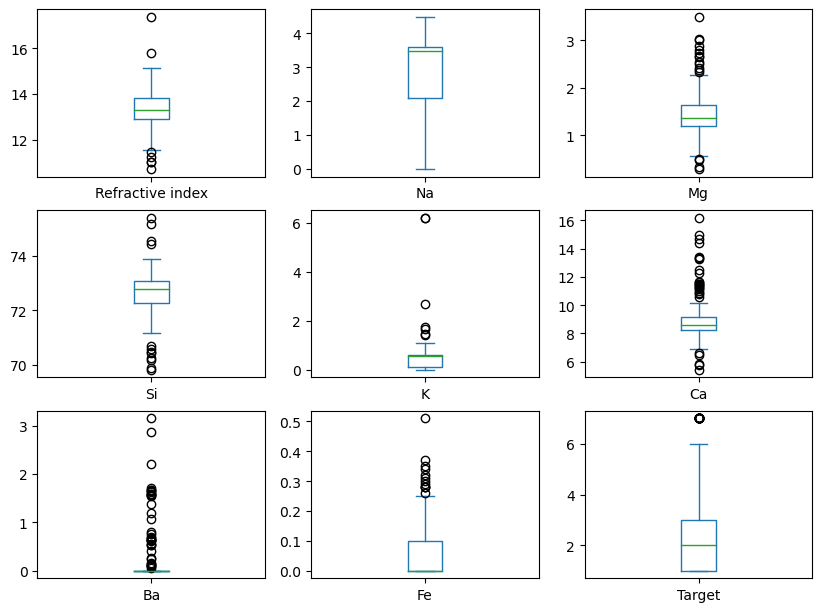

In [12]:
df.plot(kind='box',subplots=True,layout=(4,3),figsize=(10,10))

So there are outliers in every feature

Outliers removal

In [13]:
for i in df1.columns:
    IQR=df[i].quantile(0.75)-df[i].quantile(0.25)

    Q1=df[i].quantile(0.25)

    Q2=df[i].quantile(0.75)

    lowl=Q1-1.5*IQR
    print(lowl)
    upperl=Q2+1.5*IQR
    print(upperl)
    
    new_df=df[i].copy()
    
    new_df=np.where(new_df > upperl , upperl ,
                           np.where(new_df <lowl, lowl ,new_df
                                   )
                           )
    df[i]=new_df

11.535
15.175
-0.1750000000000007
5.865
0.53
2.29
71.065
74.305
-0.59
1.33
6.875
10.515
0.0
0.0
-0.15000000000000002
0.25


Refractive index       Axes(0.125,0.712609;0.227941x0.167391)
Na                  Axes(0.398529,0.712609;0.227941x0.167391)
Mg                  Axes(0.672059,0.712609;0.227941x0.167391)
Si                     Axes(0.125,0.511739;0.227941x0.167391)
K                   Axes(0.398529,0.511739;0.227941x0.167391)
Ca                  Axes(0.672059,0.511739;0.227941x0.167391)
Ba                      Axes(0.125,0.31087;0.227941x0.167391)
Fe                   Axes(0.398529,0.31087;0.227941x0.167391)
Target               Axes(0.672059,0.31087;0.227941x0.167391)
dtype: object

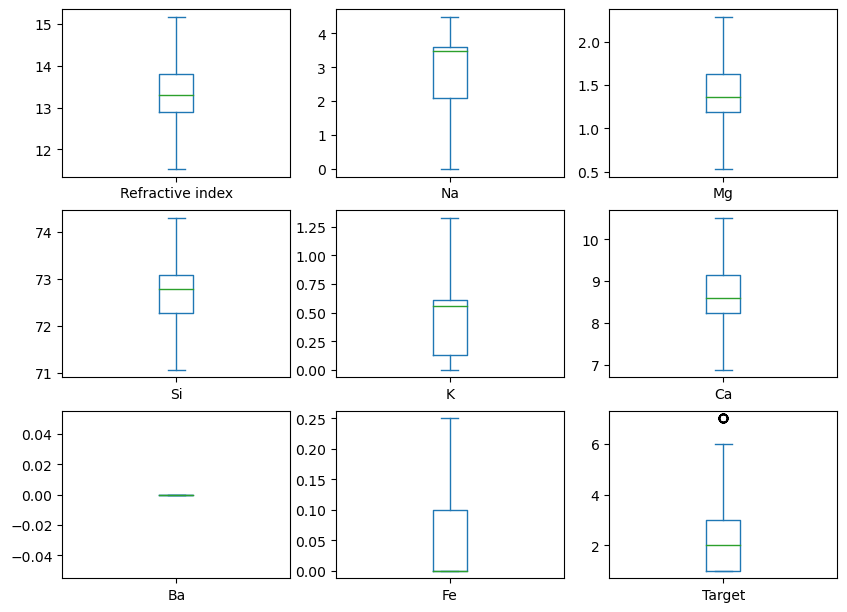

In [14]:
df.plot(kind='box',subplots=True,layout=(4,3),figsize=(10,10))

So all the outliers have been removed

Remove "Ba" as it does not have much effect

In [15]:
df.drop("Ba",axis=1,inplace=True)

In [16]:
df['Target'][df['Target']<=4]=0

In [17]:
df['Target'][df['Target']>4]=1

In [18]:
df

,Refractive index,Na,Mg,Si,K,Ca,Fe,Target
1,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0
2,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0
3,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0
4,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0
5,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0
...,...,...,...,...,...,...,...,...
210,14.14,0.00,2.29,72.61,0.08,9.18,0.0,1
211,14.92,0.00,1.99,73.06,0.00,8.40,0.0,1
212,14.36,0.00,2.02,73.42,0.00,8.44,0.0,1
213,14.38,0.00,1.94,73.61,0.00,8.48,0.0,1


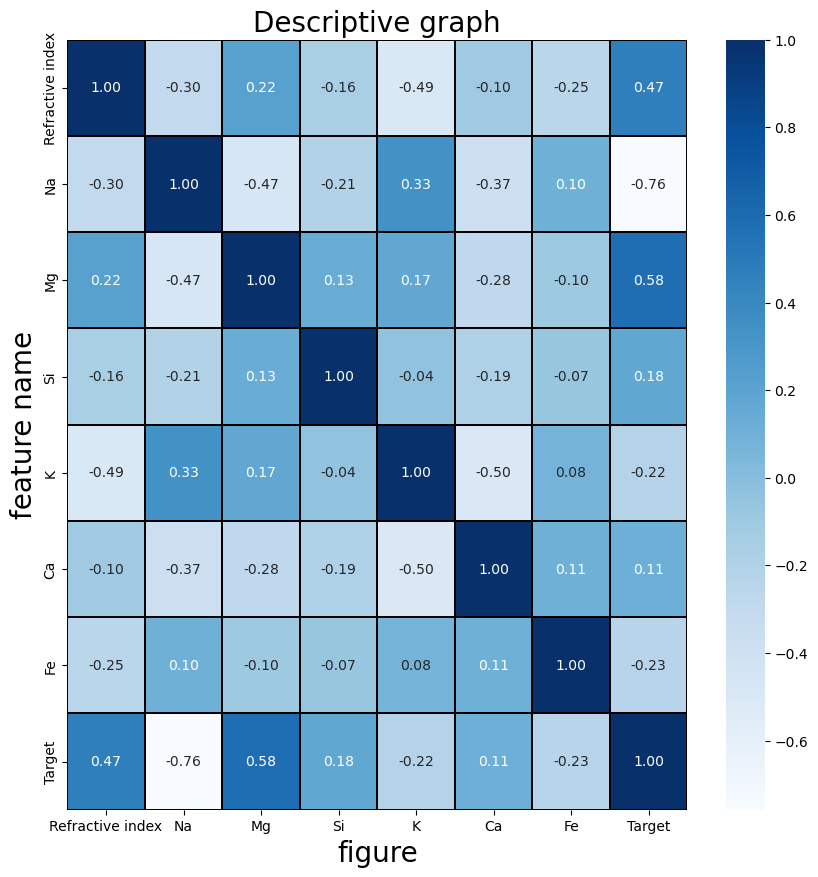

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Blues')
plt.xlabel('figure',fontsize=20)
plt.ylabel('feature name',fontsize=20)
plt.title('Descriptive graph',fontsize=20)
plt.show()

So by seeing the above figure we can see no feature is highly correlated with other feature

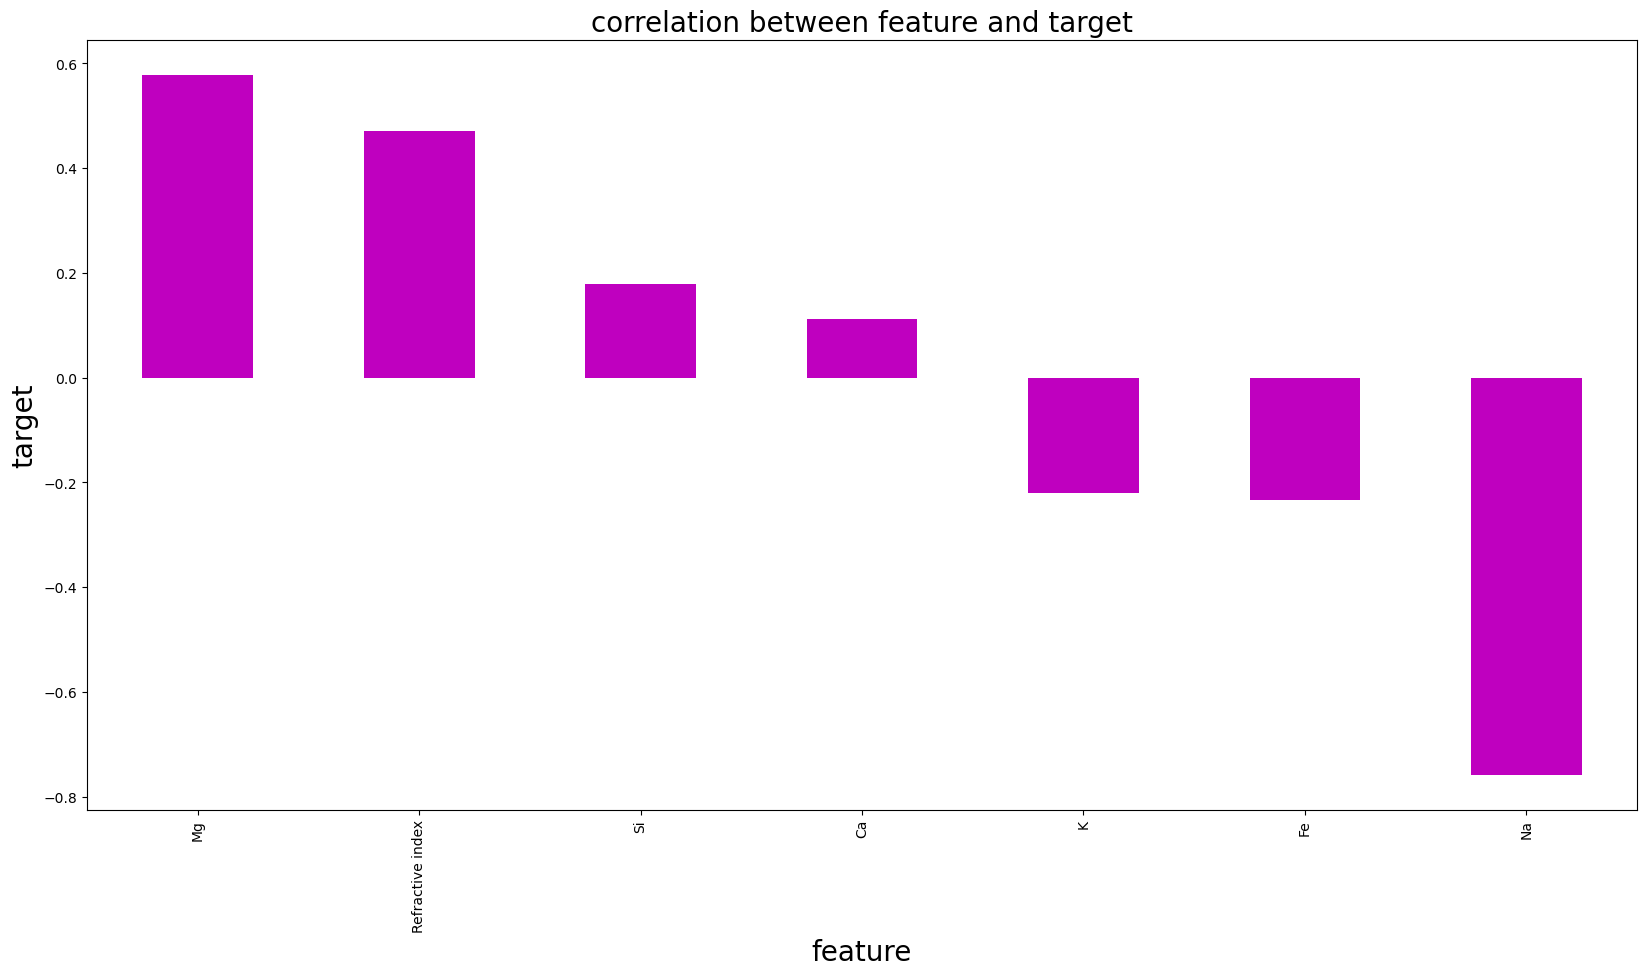

In [20]:
plt.figure(figsize=(20,10))
df.corr()['Target'].sort_values(ascending = False).drop(['Target']).plot(kind='bar',color='m')
plt.xlabel('feature',fontsize=20)
plt.ylabel('target',fontsize=20)
plt.title('correlation between feature and target',fontsize=20)
plt.show()

This is also okay the Features are correlated with the target in a good manner

Check if there is any inbalance in Target

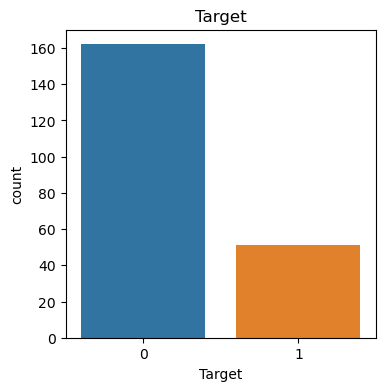

In [21]:
for i in ['Target']:
    plt.figure(figsize=(4,4))
    sns.countplot(x=i,data=df)
    plt.title(i)
    plt.show()

Split the data

In [22]:
x=df.drop('Target',axis=1)
y=df['Target']

In [23]:
y.value_counts()

Target
0    162
1     51
Name: count, dtype: int64

So u can see there is imbalance in the Target

In [24]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [25]:
x,y=sm.fit_resample(x,y)

In [26]:
y.value_counts()

Target
0    162
1    162
Name: count, dtype: int64

So now the target in balanced

In [27]:
scaler=StandardScaler()
X=scaler.fit_transform(x)
X

array([[ 0.02808581,  1.53931865, -1.06554836, ..., -0.92031027,
        -0.13555066, -0.58180512],
       [ 0.32854193,  0.99318082, -0.48696693, ...,  0.27298285,
        -1.12499248, -0.58180512],
       [-0.10411489,  0.96249892, -0.08641055, ...,  0.01727718,
        -1.17876649, -0.58180512],
       ...,
       [ 1.48229345, -1.21591604,  1.58257437, ..., -1.09078072,
        -0.25684459,  0.1977111 ],
       [ 1.61264641, -1.21591604,  1.58257437, ..., -0.9944804 ,
        -0.07376177, -0.20601252],
       [ 1.85393944, -1.21591604,  0.07969591, ..., -1.09078072,
        -1.15850521, -0.58180512]])

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV

Finding best random state for building our classification models

In [29]:
lr=LogisticRegression()
maxAcc=0
rs=0
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    ac=accuracy_score(y_test,pred)
    if ac>maxAcc:
        maxAcc=ac
        rs=i
        
print("Best score ",maxAcc)
print("random state ",rs)

Best score  0.9876543209876543
random state  12


In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=12)

In [31]:
print("size of x_train : ",x_train.shape)
print("size of x_test : ",x_test.shape)
print("size of y_train : ",y_train.shape)
print("size of y_test : ",y_test.shape)

size of x_train :  (243, 7)
size of x_test :  (81, 7)
size of y_train :  (243,)
size of y_test :  (81,)


Checking which model gives better results

In [32]:
def classify(clf,X,y):
        x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=12)
        
        #train the model
        clf.fit(x_train,y_train)
        
        #predicting Ytest
        pred=clf.predict(x_test)
        
        #accuracy score
        acc_score=accuracy_score(y_test,pred)
        print("Accuracy score",acc_score)
        
        #confusion matrix
        print("Confusion matrix :\n",confusion_matrix(y_test,pred))
        
        #classification report
        print("Classification report :\n",classification_report(y_test,pred))
        
        #cross validation score
        cv_score=(cross_val_score(clf,x,y,cv=5).mean())
        print("cross validation score ",cv_score)
        
        #Result of accuracy minus cv scores
        result=acc_score-cv_score
        print("The final result of accuracy minus cross validation is ",result)

In [33]:
clf=LogisticRegression()
classify(clf,X,y)

Accuracy score 0.9876543209876543
Confusion matrix :
 [[41  0]
 [ 1 39]]
Classification report :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        41
           1       1.00      0.97      0.99        40

    accuracy                           0.99        81
   macro avg       0.99      0.99      0.99        81
weighted avg       0.99      0.99      0.99        81

cross validation score  0.9198557692307693
The final result of accuracy minus cross validation is  0.06779855175688498


DesicionTreeClassifier

In [34]:
clf=DecisionTreeClassifier()
classify(clf,X,y)

Accuracy score 0.9506172839506173
Confusion matrix :
 [[39  2]
 [ 2 38]]
Classification report :
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        41
           1       0.95      0.95      0.95        40

    accuracy                           0.95        81
   macro avg       0.95      0.95      0.95        81
weighted avg       0.95      0.95      0.95        81

cross validation score  0.9230288461538461
The final result of accuracy minus cross validation is  0.027588437796771226


In [35]:
clf=RandomForestClassifier()
classify(clf,X,y)

Accuracy score 0.9876543209876543
Confusion matrix :
 [[40  1]
 [ 0 40]]
Classification report :
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.98      1.00      0.99        40

    accuracy                           0.99        81
   macro avg       0.99      0.99      0.99        81
weighted avg       0.99      0.99      0.99        81

cross validation score  0.9476923076923077
The final result of accuracy minus cross validation is  0.03996201329534654


In [36]:
clf=AdaBoostClassifier()
classify(clf,X,y)

Accuracy score 0.9753086419753086
Confusion matrix :
 [[40  1]
 [ 1 39]]
Classification report :
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.97      0.97      0.97        40

    accuracy                           0.98        81
   macro avg       0.98      0.98      0.98        81
weighted avg       0.98      0.98      0.98        81

cross validation score  0.9199999999999999
The final result of accuracy minus cross validation is  0.055308641975308714


In [37]:
clf=GradientBoostingClassifier()
classify(clf,X,y)

Accuracy score 0.9753086419753086
Confusion matrix :
 [[40  1]
 [ 1 39]]
Classification report :
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.97      0.97      0.97        40

    accuracy                           0.98        81
   macro avg       0.98      0.98      0.98        81
weighted avg       0.98      0.98      0.98        81

cross validation score  0.9415384615384615
The final result of accuracy minus cross validation is  0.0337701804368471


In [38]:
clf=SVC()
classify(clf,X,y)

Accuracy score 1.0
Confusion matrix :
 [[41  0]
 [ 0 40]]
Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        40

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81

cross validation score  0.5688461538461539
The final result of accuracy minus cross validation is  0.4311538461538461


In [39]:
clf=KNeighborsClassifier()
classify(clf,X,y)

Accuracy score 1.0
Confusion matrix :
 [[41  0]
 [ 0 40]]
Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        40

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81

cross validation score  0.9537980769230769
The final result of accuracy minus cross validation is  0.04620192307692306


Hyperparamter tuning

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=12)

model = RandomForestClassifier()

param_grid = {
    'n_estimators': [1,10,20],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Set Score:", test_score)

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
Best Score: 0.9630952380952381
Test Set Score: 0.9876543209876543


In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

save the model using pickle

svc gives the best report so its taken to save as a model

In [46]:
svc=SVC()
svc.fit(x_train,y_train)
        
pred=svc.predict(x_test)
        
acc_score=accuracy_score(y_test,pred)
print("Accuracy score",acc_score)
        
print("Confusion matrix :\n",confusion_matrix(y_test,pred))
        
print("Classification report :\n",classification_report(y_test,pred))
        
cv_score=(cross_val_score(clf,x,y,cv=5).mean())
print("cross validation score ",cv_score)
        
result=acc_score-cv_score
print("The final result of accuracy minus cross validation is ",result)

Accuracy score 1.0
Confusion matrix :
 [[41  0]
 [ 0 40]]
Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        40

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81

cross validation score  0.9537980769230769
The final result of accuracy minus cross validation is  0.04620192307692306


In [47]:
import pickle

In [49]:
filename='glass.pkl'
pickle.dump(svc,open(filename,'wb'))

In [51]:
loaded_model=pickle.load(open('glass.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

100.0


In [52]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
Predicted,0,0,1,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
Original,0,0,1,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
